# Comparison between Descartes and Gregor
Import dependencies.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from IPython.display import HTML
from tables import IPythonTableBuilder
from projects import Project
from score_comparison import get_both_scores, render_table, show_plot

Get the list of projects and compute the scores for both mutation engines.

In [2]:
projects = list(Project.available_projects())
scores = [get_both_scores(p) for p in projects]
descartes = [s[0].score for s in scores]
gregor = [s[1].score for s in scores]

Render a table listing all projects and all measured statistics.

In [6]:
render_table([p.name for p in projects], scores, IPythonTableBuilder)

Project,Mutants,Killed,Score,Mutants,Killed,Score
AuthZForce PDP Core,378,358,94.71,3536,3188,90.16
Amazon Web Services SDK,3090,2732,88.41,17406,13536,77.77
Apache Commons CLI,256,246,96.09,2455,2183,88.92
Apache Commons Codec,912,875,95.94,8687,7765,89.39
Apache Commons Collections,1556,1463,94.02,8144,7073,86.85
Apache Commons IO,1035,968,93.53,7633,6500,85.16
Apache Commons Lang,3261,3135,96.14,25431,22120,86.98
Apache Flink,2781,2373,85.33,21350,16647,77.97
Google Gson,657,617,93.91,6179,5079,82.20
Jaxen XPath Engine,953,921,96.64,9002,6041,67.11


Show the visual correlation of the scores obtained by both mutation engines.

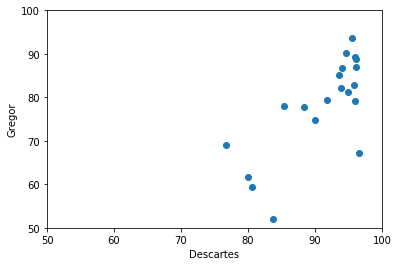

In [9]:
show_plot(descartes, gregor)

Compute and show the [Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) between both sets of scores.

In [16]:
corr = spearmanr(descartes, gregor)
HTML(f'''
The Spearman correlation coefficient is <strong>{corr.correlation}</strong> 
with a p-value of <strong>{corr.pvalue}</strong>
''')